In [1]:
# importation des modules necessaire
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')
import joblib

### Comprehension des donnees

In [2]:
#importation du dataset
data = pd.read_csv("Loan_default.csv")

In [3]:
# premiere visualisation du haut de la dataset
data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [4]:
# Quantitative variables:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,255347.0,43.498306,14.990258,18.0,31.00,43.00,56.00,69.0
Income,255347.0,82499.304597,38963.013729,15000.0,48825.50,82466.00,116219.00,149999.0
LoanAmount,255347.0,127578.865512,70840.706142,5000.0,66156.00,127556.00,188985.00,249999.0
CreditScore,255347.0,574.264346,158.903867,300.0,437.00,574.00,712.00,849.0
MonthsEmployed,255347.0,59.541976,34.643376,0.0,30.00,60.00,90.00,119.0
NumCreditLines,255347.0,2.501036,1.117018,1.0,2.00,2.00,3.00,4.0
InterestRate,255347.0,13.492773,6.636443,2.0,7.77,13.46,19.25,25.0
LoanTerm,255347.0,36.025894,16.969330,12.0,24.00,36.00,48.00,60.0
DTIRatio,255347.0,0.500212,0.230917,0.1,0.30,0.50,0.70,0.9
Default,255347.0,0.116128,0.320379,0.0,0.00,0.00,0.00,1.0


In [5]:
categorical_columns = data.select_dtypes(include='object').columns

categorical_columns = [col for col in categorical_columns if col != 'LoanID']

summary_dict = {}

for column in categorical_columns:
    categories = data[column].value_counts().index.tolist()
    summary_dict[column] = categories

for column, category_values in summary_dict.items():
    print(f"{column}: {category_values}")


Education: ["Bachelor's", 'High School', "Master's", 'PhD']
EmploymentType: ['Part-time', 'Unemployed', 'Self-employed', 'Full-time']
MaritalStatus: ['Married', 'Divorced', 'Single']
HasMortgage: ['Yes', 'No']
HasDependents: ['Yes', 'No']
LoanPurpose: ['Business', 'Home', 'Education', 'Other', 'Auto']
HasCoSigner: ['Yes', 'No']


In [6]:
# information sur la dimention du dataset
data.shape

(255347, 18)

##### We have 255347 rows and 18 columns in our dataset and


In [7]:
# information sur le dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

### Description des variables
| Variable | Description | Type |
| --------------- | --------------- | --------------- |
| LoanID | Identifiant unique du prêt | Object |
| Age | Âge de l'emprunteur | Int64 |
| Income | Revenu annuel de l'emprunteur | Int64 |
| LoanAmount | Montant du prêt demandé | Int64 |
| CreditScore | Cote de crédit de l'emprunteur | Int64 |
| MonthsEmployed | Nombre de mois d'emploi actuel | Int64 |
| NumCreditLines | Nombre de lignes de crédit détenues | Int64 |
| InterestRate | Taux d'intérêt du prêt | Float64 |
| LoanTerm | Durée du prêt en mois | Int64 |
| DTIRatio | Ratio dette/revenu de l'emprunteur | Float64 |
| Education | Niveau d'éducation de l'emprunteur | Object |
| EmploymentType | Type d'emploi de l'emprunteur | Object |
| MaritalStatus | Statut matrimonial de l'emprunteur | Object |
| HasMortgage | Indicateur de prêt hypothécaire | Object |
| HasDependents | Indicateur de personnes à charge | Object |
| LoanPurpose | Objectif du prêt | Object |
| HasCoSigner | Indicateur de co-emprunteur | Object |
| Default | Indicateur de défaut de paiement (1 si oui, 0 sinon) | Int64 |0 sinon) | Object |

#### We can see there are three formats of data types:
object: Object format means variables are categorical. Categorical variables in our
dataset are"MaritalStatus", "HasMortgage", "HasDependents", "LoanPurpose", "HasCoSigner"tus
int64: It represents the integer variables. ApplicantIncome is of this format.
float64: It represents the variable that has some decimal values involved. They are also
numerical variables. Numerical variables in our dataset'Age', 'Income', 'LoanAmount', 'CreditScore', 'InterestRate','DTIRatio'ataset.


# I. Analyse exploratoire des données (AED)

## a) Visualisation des données

### La dispertion des donnees numeriques

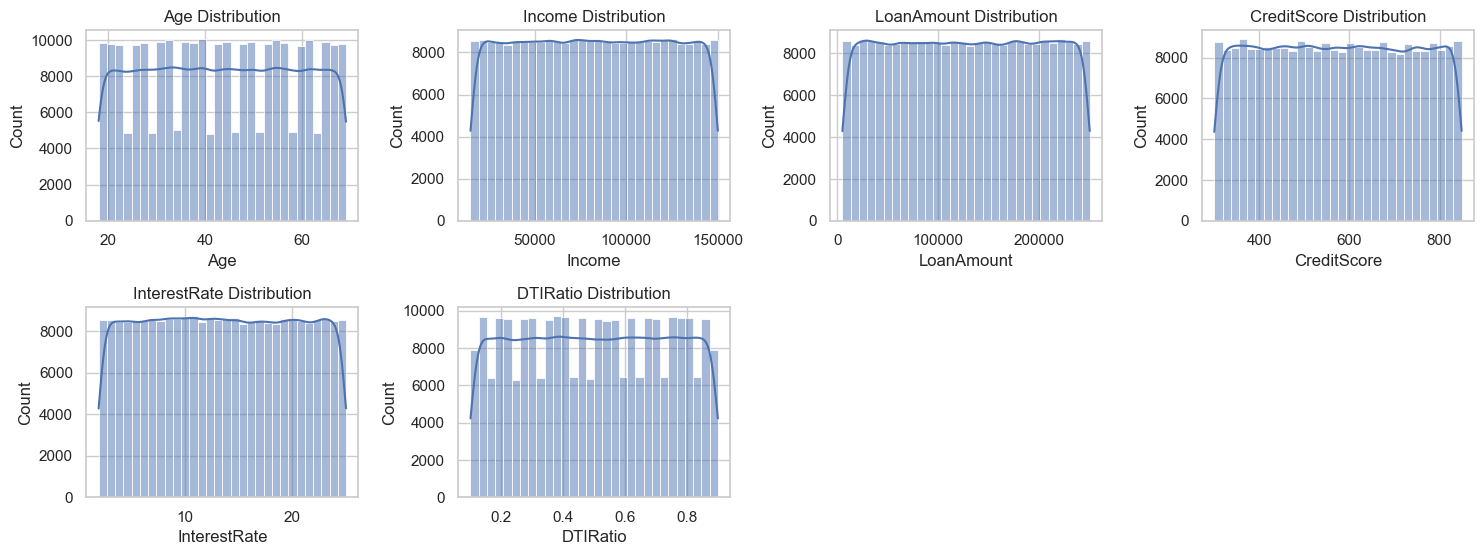

In [8]:
sns.set(style="whitegrid")
numVariables = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'InterestRate','DTIRatio']

plt.figure(figsize=(15, 8))
for i, var in enumerate(numVariables):
    plt.subplot(3, 4, i+1)
    sns.histplot(data[var], bins=30, kde=True)
    plt.title(f"{var} Distribution")

plt.tight_layout()
plt.show()

#### La répartition de l'âge 
dans l'ensemble des données suit une distribution normale, avec une fréquence plus élevée d'individus dans la tranche d'âge moyenne. Les individus plus jeunes et plus âgés ont des fréquences inférieures à celles du groupe d'âge moyen.

#### La répartition des revenus 
dans l'ensemble des données suit une distribution normale, avec une fréquence plus élevée d'individus dans les tranches de revenus inférieures et moyennes. Les individus ayant des revenus plus élevés ont des fréquences plus faibles, ce qui indique qu'ils sont moins fréquents dans l'ensemble de données.

#### La distribution du montant du prêt 
dans l'ensemble de données suit une distribution normale, avec une fréquence plus élevée de personnes demandant des montants de prêt plus faibles. Au fur et à mesure que le montant du prêt augmente, la fréquence des personnes diminue, ce qui indique que les prêts d'un montant plus élevé sont moins fréquents dans l'ensemble de données.
#### La distribution du CreditScore 
dans l'ensemble de données suit une distribution normale, avec une fréquence plus élevée d'individus ayant des scores de crédit dans une certaine fourchette. Lorsque le score de crédit s'écarte de cette fourchette, la fréquence diminue, ce qui indique que les scores de crédit extrêmes sont moins fréquents dans l'ensemble de données.

#### La distribution du taux d'intérêt 
dans l'ensemble des données suit une distribution normale, avec une fréquence plus élevée d'individus ayant des taux d'intérêt dans une certaine fourchette. Lorsque le taux d'intérêt s'écarte de cette fourchette, la fréquence diminue, ce qui indique que les taux d'intérêt extrêmes sont moins fréquents dans l'ensemble de données.

#### La distribution du ratio dette/revenu (DTIRatio) 
dans l'ensemble de données suit une distribution normale, avec une fréquence plus élevée d'individus ayant des DTIRatios dans une certaine fourchette. Lorsque le rapport DTI s'écarte de cette fourchette, la fréquence diminue, ce qui indique que les rapports DTI extrêmes sont moins fréquents dans l'ensemble de données.
22

### La dispertion des donnees categoriel

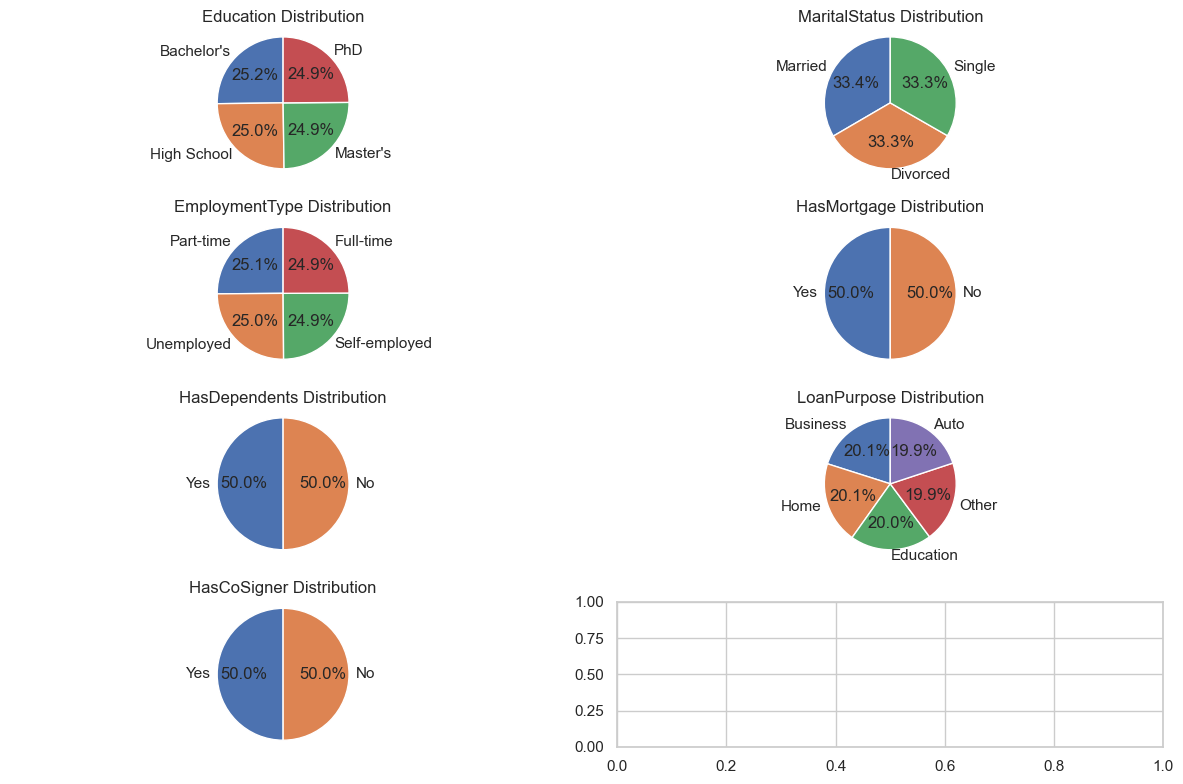

In [9]:
sns.set(style="whitegrid")

categorical_variables = ['Education', 'MaritalStatus', 'EmploymentType', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']

num_variables = len(categorical_variables)
num_rows = int(math.ceil(num_variables / 2))
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

axes = axes.flatten()

for i, variable in enumerate(categorical_variables):
    
    row_position = i // num_cols
    col_position = i % num_cols
    
    
    counts = data[variable].value_counts()
    
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].axis('equal')  
    axes[i].set_title(f'{variable} Distribution')


plt.tight_layout()
plt.show()


#### Le graph permet d'observer les éléments suivants :
1. Une part importante de la population a fait des études supérieures, et un grand nombre d'entre elle est titulaire d'un diplôme de haut niveau (master ou doctorat).
2. La majorité des individus sont des travailleurs indépendants, soit 50 % de la population.
3. La répartition de l'état civil est relativement équilibrée, aucune catégorie ne dominant les autres.

### Identification des relations entre les variables et la variable cibles

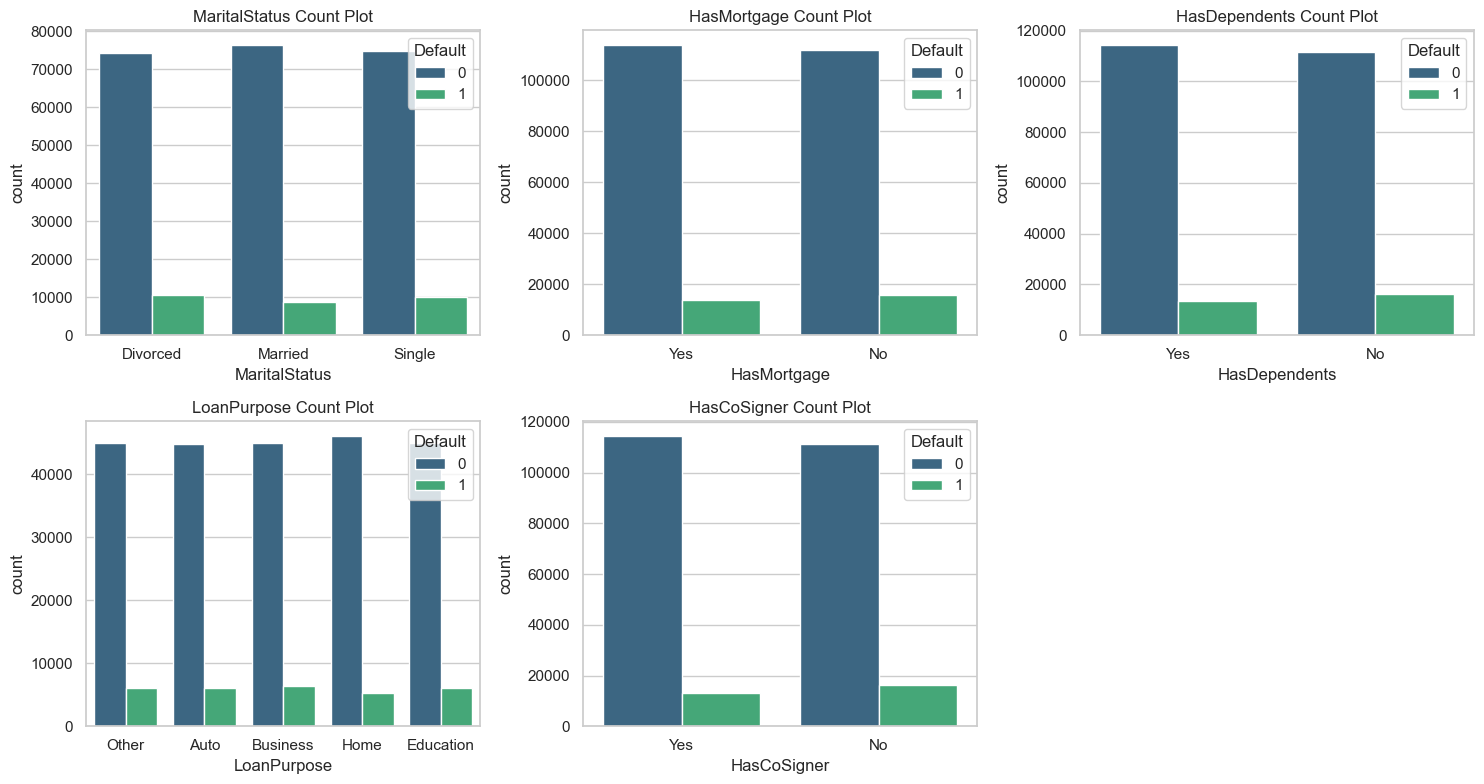

In [10]:
categorical_vars = ["MaritalStatus", "HasMortgage", "HasDependents", "LoanPurpose", "HasCoSigner"]
plt.figure(figsize=(15, 8))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=var, data=data, hue="Default", palette="viridis")
    plt.title(f"{var} Count Plot")

plt.tight_layout()
plt.show()

#### Loan Purpose
On peut en déduire que la proportion (Other, Auto, Business,Home,Education) est plus ou moins la même pour les prêts approuvés et non approuvés.

#### Has Dependents
On peut en déduire que la proportion (Yes, No) est plus ou moins la même pour les prêts approuvés et non approuvés.

#### Has CoSinger
On peut en déduire que la proportion (Yes,  No) est plus ou moins la même pour les prêts approuvés et non approuvés.

#### Has Mortgage
On peut en déduire que la proportion (Yes, No) est plus ou moins la même pour les prêts approuvés et non approuvés.

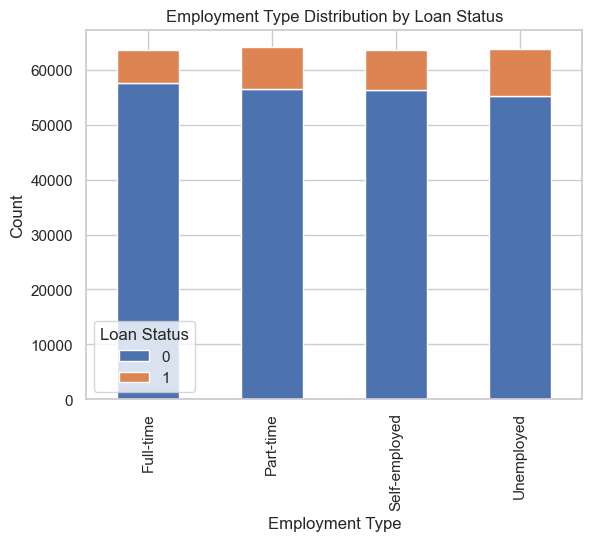

In [11]:
counts = data["EmploymentType"].value_counts()

counts = data.groupby(["EmploymentType", "Default"]).size().unstack(fill_value=0)
counts.plot(kind="bar", stacked=True)
plt.xlabel("Employment Type")
plt.ylabel("Count")
plt.title("Employment Type Distribution by Loan Status")
plt.legend(title="Loan Status")
plt.show()

#### Statut du pret par Type d'emploi
Nous pouvons constater que la proportion de prêts approuvés pour par type d'emploi du demandeur est preseque le meme par rapport 
proportion de prêts refusés

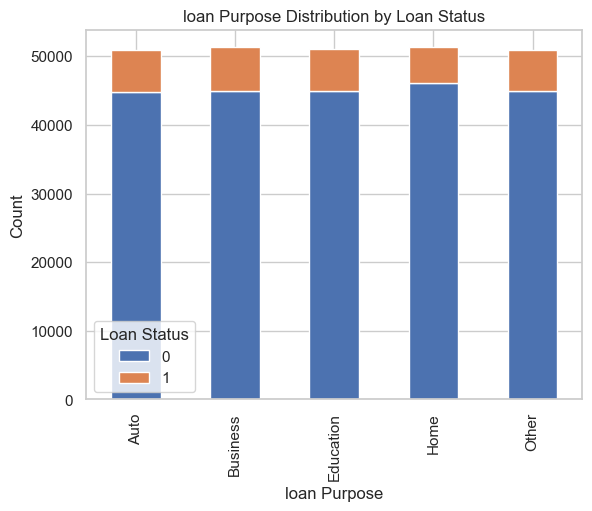

In [12]:
counts = data["LoanPurpose"].value_counts()

counts = data.groupby(["LoanPurpose", "Default"]).size().unstack(fill_value=0)
counts.plot(kind="bar", stacked=True)
plt.xlabel("loan Purpose")
plt.ylabel("Count")
plt.title("loan Purpose Distribution by Loan Status")
plt.legend(title="Loan Status")
plt.show()

#### Statut du pret par Objectif d'emploi
Nous pouvons constater que la proportion de prêts approuvés pour par type objectif du pret est plus élevé. que les prêts refusés

<Figure size 500x300 with 0 Axes>

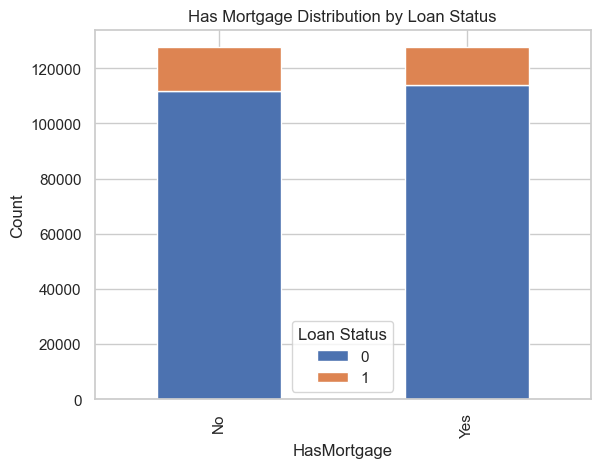

In [13]:
counts = data["HasMortgage"].value_counts()

counts = data.groupby(["HasMortgage", "Default"]).size().unstack(fill_value=0)
plt.figure(figsize=(5, 3))
counts.plot(kind="bar", stacked=True)
plt.xlabel("HasMortgage")
plt.ylabel("Count")
plt.title("Has Mortgage Distribution by Loan Status")
plt.legend(title="Loan Status")
plt.show()

#### Statut du pret par Indicateur de prêt hypothécaire
Nous pouvons constater que la proportion de prêts approuvés pour (Indicateur de prêt hypothécaire) est plus élevé. que les prêts refusés

In [14]:
data['LoanToIncomeRatio'] = data['LoanAmount']/data['Income']
data['FinancialRiskScore'] = data['CreditScore'] - data['LoanToIncomeRatio'] + (data['MonthsEmployed']/12)

#### Loan To Income Ratio
The loan-to-income ratio is a financial metric that represents the proportion of a person's income that goes towards repaying a loan. It is often used by lenders to assess a borrower's ability to manage their debt. A higher loan-to-income ratio could indicate higher financial stress.
#### Financial Risk Score
The idea is that a higher credit score and longer employment duration might contribute positively to the financial risk score, while a higher loan-to-income ratio might contribute negatively

La corrélation entre RatioEmpruntSurRevenu et la CIBLE est 0.1790
Valeur médiane pour les prêts non remboursés = 2.0499
Valeur médiane pour les prêts remboursés = 1.4956


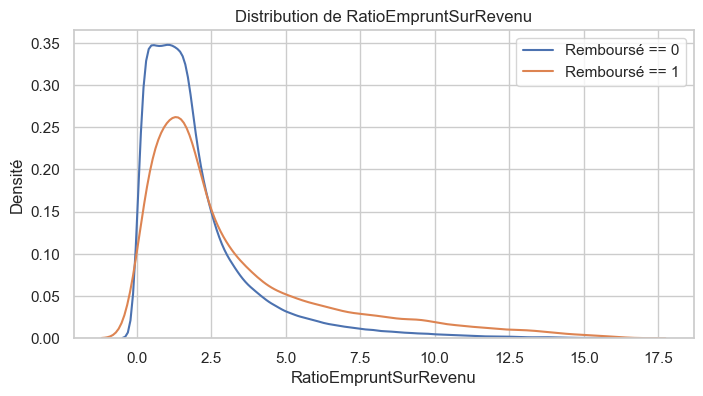

In [15]:
avg_rembourse = data.loc[data['Default'] == 0, 'LoanToIncomeRatio'].median()
avg_non_rembourse = data.loc[data['Default'] == 1, 'LoanToIncomeRatio'].median()

plt.figure(figsize=(8, 4))

sns.kdeplot(data.loc[data['Default'] == 0, 'LoanToIncomeRatio'], label='Remboursé == 0')
sns.kdeplot(data.loc[data['Default'] == 1, 'LoanToIncomeRatio'], label='Remboursé == 1')

plt.xlabel('RatioEmpruntSurRevenu')
plt.ylabel('Densité')
plt.title('Distribution de %s' % 'RatioEmpruntSurRevenu')
plt.legend()

print('La corrélation entre %s et la CIBLE est %0.4f' % ('RatioEmpruntSurRevenu', data['Default'].corr(data['LoanToIncomeRatio'])))

print('Valeur médiane pour les prêts non remboursés = %0.4f' % avg_non_rembourse)
print('Valeur médiane pour les prêts remboursés = %0.4f' % avg_rembourse)


le graphique de l'estimation de la densité du noyau (KDE) montre que les lignes sont asymétriques vers la gauche et se chevauchent, ce qui suggère que la distribution de la variable "LoanToIncomeRatio" est différente pour les prêts qui ont été remboursés ("Défaut == 0") par rapport aux prêts qui n'ont pas été remboursés ("Défaut == 1").

les lignes sont inclinées vers la gauche, cela signifie que la majorité des valeurs de "LoanToIncomeRatio" sont concentrées dans la partie inférieure. Dans le contexte des remboursements de prêts, cela pourrait indiquer que les prêts avec des ratios prêt/revenu inférieurs sont plus fréquents dans l'ensemble de données.

La corrélation entre ScoreRisqueFinancier et la CIBLE est -0.0384
Valeur médiane pour les prêts non remboursés = 553.8528
Valeur médiane pour les prêts remboursés = 579.5443


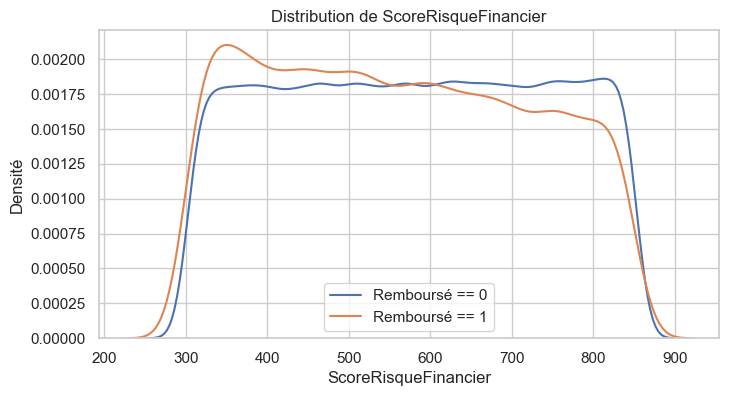

In [16]:
avg_rembourse = data.loc[data['Default'] == 0, 'FinancialRiskScore'].median()
avg_non_rembourse = data.loc[data['Default'] == 1, 'FinancialRiskScore'].median()

plt.figure(figsize=(8, 4))

sns.kdeplot(data.loc[data['Default'] == 0, 'FinancialRiskScore'], label='Remboursé == 0')
sns.kdeplot(data.loc[data['Default'] == 1, 'FinancialRiskScore'], label='Remboursé == 1')

plt.xlabel('ScoreRisqueFinancier')
plt.ylabel('Densité')
plt.title('Distribution de %s' % 'ScoreRisqueFinancier')
plt.legend()

print('La corrélation entre %s et la CIBLE est %0.4f' % ('ScoreRisqueFinancier',  data['Default'].corr(data['FinancialRiskScore'])))
print('Valeur médiane pour les prêts non remboursés = %0.4f' % avg_non_rembourse)
print('Valeur médiane pour les prêts remboursés = %0.4f' % avg_rembourse)


Coefficient de corrélation :

La corrélation entre 'FinancialRiskScore' et la variable 'TARGET' est de -0,0384. Cette corrélation négative faible suggère une relation négative légère entre le score de risque financier et la probabilité de défaut de prêt. À mesure que le 'FinancialRiskScore' diminue, il y a une légère tendance à ce que la variable cible (remboursé ou non remboursé) augmente, et vice versa.
Valeurs médianes :

La médiane de 'FinancialRiskScore' pour les prêts non remboursés est de 553,8528, tandis que la médiane pour les prêts remboursés est de 579,5443. La différence entre les valeurs médianes indique qu'en moyenne, les prêts non remboursés ont un score de risque financier légèrement inférieur par rapport aux prêts remboursés.
En résumé :

Corrélation négative faible : La corrélation négative suggère une tendance subtile où les scores de risque financier plus bas sont associés à une probabilité légèrement plus élevée de défaut de prêt.

Comparaison des médianes : La médiane légèrement inférieure du 'FinancialRiskScore' pour les prêts non remboursés soutient l'idée que les prêts avec des scores de risque financier plus bas sont plus fréquents parmi les défauts.

# Gestion des données manquantes

In [17]:
data.isnull().sum()

LoanID                0
Age                   0
Income                0
LoanAmount            0
CreditScore           0
MonthsEmployed        0
NumCreditLines        0
InterestRate          0
LoanTerm              0
DTIRatio              0
Education             0
EmploymentType        0
MaritalStatus         0
HasMortgage           0
HasDependents         0
LoanPurpose           0
HasCoSigner           0
Default               0
LoanToIncomeRatio     0
FinancialRiskScore    0
dtype: int64

#### Il n' ya pas de donnees null

In [18]:
data.isna().sum()

LoanID                0
Age                   0
Income                0
LoanAmount            0
CreditScore           0
MonthsEmployed        0
NumCreditLines        0
InterestRate          0
LoanTerm              0
DTIRatio              0
Education             0
EmploymentType        0
MaritalStatus         0
HasMortgage           0
HasDependents         0
LoanPurpose           0
HasCoSigner           0
Default               0
LoanToIncomeRatio     0
FinancialRiskScore    0
dtype: int64

#### pas de donnees manquantes
L'absence de valeurs manquantes indique que notre ensemble de données est complet et que nous disposons d'informations pour toutes les observations et variables.

### Segmentation des données

In [19]:
# segmentation par âge
bins = [18, 30, 45, 60, 100]
labels = ['18-30', '30-45', '45-60', '60+']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels)


In [20]:
# segmentation par revenu
bins = [0, 50000, 100000, 150000, 200000]
labels = ['0-50k', '50k-100k', '100k-150k', '150k+']
data['IncomeGroup'] = pd.cut(data['Income'], bins=bins, labels=labels)


In [21]:
# segmentation par score de crédit
bins = [0, 500, 700, 850]
labels = ['0-500', '500-700', '700-850']
data['CreditScoreGroup'] = pd.cut(data['CreditScore'], bins=bins, labels=labels)


In [22]:
# segmentation par durée du prêt
bins = [0, 12, 24, 60]
labels = ['0-12', '12-24', '24-60']
data['LoanTermGroup'] = pd.cut(data['LoanTerm'], bins=bins, labels=labels)


In [23]:
data

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,HasDependents,LoanPurpose,HasCoSigner,Default,LoanToIncomeRatio,FinancialRiskScore,AgeGroup,IncomeGroup,CreditScoreGroup,LoanTermGroup
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,...,Yes,Other,Yes,0,0.588262,526.078405,45-60,50k-100k,500-700,24-60
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,...,No,Other,Yes,0,2.467481,456.782519,60+,50k-100k,0-500,24-60
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,...,Yes,Auto,No,1,1.534154,451.632513,45-60,50k-100k,0-500,12-24
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,...,No,Business,No,0,1.412638,741.587362,30-45,0-50k,700-850,12-24
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,...,Yes,Auto,No,0,0.447179,633.219488,45-60,0-50k,500-700,24-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,...,No,Other,No,0,5.547329,544.536005,18-30,0-50k,500-700,0-12
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,...,No,Home,No,1,3.655208,508.511459,30-45,50k-100k,500-700,12-24
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,...,Yes,Auto,Yes,0,2.455718,600.377615,45-60,50k-100k,500-700,24-60
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,...,Yes,Other,No,0,0.711734,811.621599,30-45,50k-100k,700-850,24-60


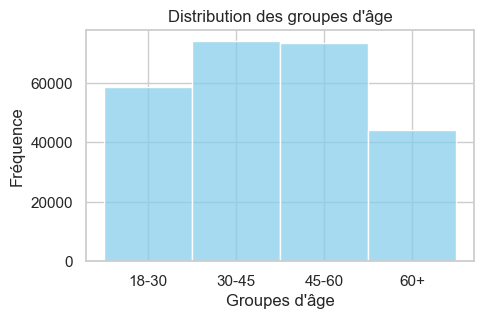

In [24]:
plt.figure(figsize=(5, 3))
sns.histplot(data['AgeGroup'], kde=False, color='skyblue')
plt.title('Distribution des groupes d\'âge')
plt.xlabel('Groupes d\'âge')
plt.ylabel('Fréquence')
plt.show()

L'histogramme montre que l'âge des demandeurs de prêts est principalement concentré entre 30 et 60 ans.

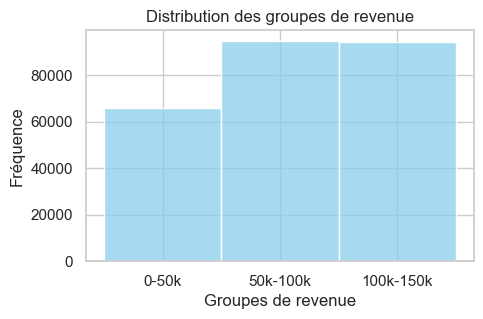

In [25]:
plt.figure(figsize=(5, 3))
sns.histplot(data['IncomeGroup'], kde=False, color='skyblue')
plt.title('Distribution des groupes de revenue')
plt.xlabel('Groupes de revenue')
plt.ylabel('Fréquence')
plt.show()

L'histogramme montre que le revenu des demandeurs de prêts est principalement concentré entre 50000$ et 150000

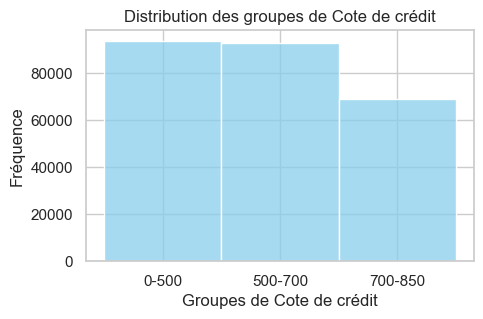

In [26]:
plt.figure(figsize=(5, 3))
sns.histplot(data['CreditScoreGroup'], kde=False, color='skyblue')
plt.title('Distribution des groupes de Cote de crédit')
plt.xlabel('Groupes de Cote de crédit')
plt.ylabel('Fréquence')
plt.show()

La distribution des scores de crédit dans l'ensemble de données suit une distribution normale, avec une fréquence plus élevée d'individus ayant des scores de crédit dans (0 et 700). Lorsque le score de crédit s'écarte de cette fourchette, la fréquence diminue, ce qui indique que les scores de crédit extrêmes sont moins fréquents dans l'ensemble de données.

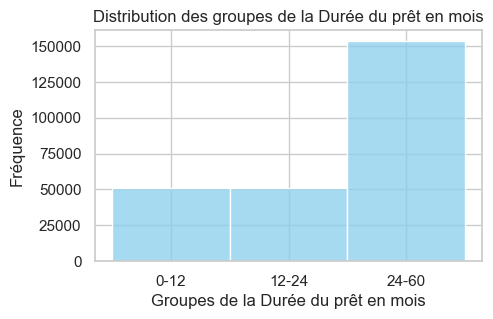

In [27]:
plt.figure(figsize=(5, 3))
sns.histplot(data['LoanTermGroup'], kde=False, color='skyblue')
plt.title('Distribution des groupes de la Durée du prêt en mois')
plt.xlabel('Groupes de la Durée du prêt en mois')
plt.ylabel('Fréquence')
plt.show()

La distribution des durée de pret dans l'ensemble de données suit une distribution anormale, avec une fréquence plus élevée d'individus ayant des scores de crédit dans plus que 24. Lorsque la durée de pret diminue, la fréquence augmant,

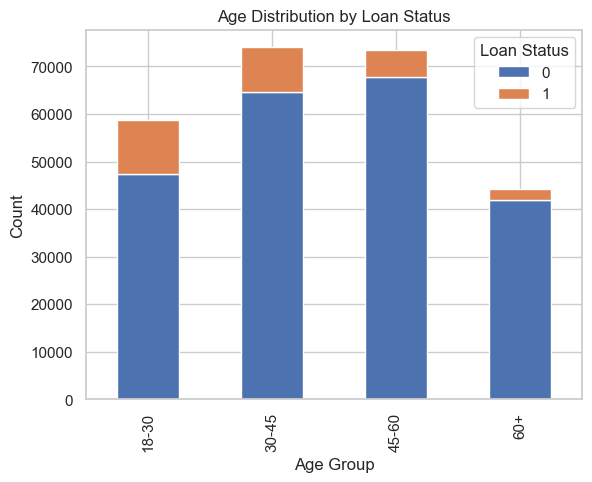

In [28]:

# Count the number of individuals in each age group with different loan statuses
counts = data.groupby(["AgeGroup", "Default"]).size().unstack(fill_value=0)

# Create a stacked bar plot to visualize the age intervals with loan statuses
counts.plot(kind="bar", stacked=True)
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Age Distribution by Loan Status")
plt.legend(title="Loan Status")
plt.show()

Nous pouvons constater que la proportion de prêts approuvés par age du demandeur est plus elevé par rapport 
proportion de prêts refusés

In [29]:
data = data.drop(columns=['LoanID', 'Education'])

### Nous pouvons supprime le loanID et Education parce que il n'on pas d'influance sur la variable cible

# Corrélations entre variables :

In [30]:
data = data.drop(columns=["IncomeGroup","CreditScoreGroup","AgeGroup","LoanTermGroup"])
data['MaritalStatus'] = data['MaritalStatus'].map({'Divorced': 0, 'Married': 1, 'Single': 2})
data['EmploymentType'] = data['EmploymentType'].map({'Unemployed': 0, 'Full-time': 1, 'Self-employed': 2, 'Part-time': 3})
data['HasMortgage'] = data['HasMortgage'].map({'No': 0, 'Yes': 1})
data['HasDependents'] = data['HasDependents'].map({'No': 0, 'Yes': 1})
data['LoanPurpose'] = data['LoanPurpose'].map({'Auto': 0, 'Business': 1, 'Education': 2, 'Home': 3, 'Other': 4})
data['HasCoSigner'] = data['HasCoSigner'].map({'No': 0, 'Yes': 1})

In [31]:
data

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,LoanToIncomeRatio,FinancialRiskScore
0,56,85994,50587,520,80,4,15.23,36,0.44,1,0,1,1,4,1,0,0.588262,526.078405
1,69,50432,124440,458,15,1,4.81,60,0.68,1,1,0,0,4,1,0,2.467481,456.782519
2,46,84208,129188,451,26,3,21.17,24,0.31,0,0,1,1,0,0,1,1.534154,451.632513
3,32,31713,44799,743,0,3,7.07,24,0.23,1,1,0,0,1,0,0,1.412638,741.587362
4,60,20437,9139,633,8,4,6.51,48,0.73,0,0,0,1,0,0,0,0.447179,633.219488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,1,1,0,0,4,0,0,5.547329,544.536005
255343,32,51953,189899,511,14,2,11.55,24,0.21,3,0,0,0,3,0,1,3.655208,508.511459
255344,56,84820,208294,597,70,3,5.29,60,0.50,2,1,1,1,0,1,0,2.455718,600.377615
255345,42,85109,60575,809,40,1,20.90,48,0.44,3,2,1,1,4,0,0,0.711734,811.621599


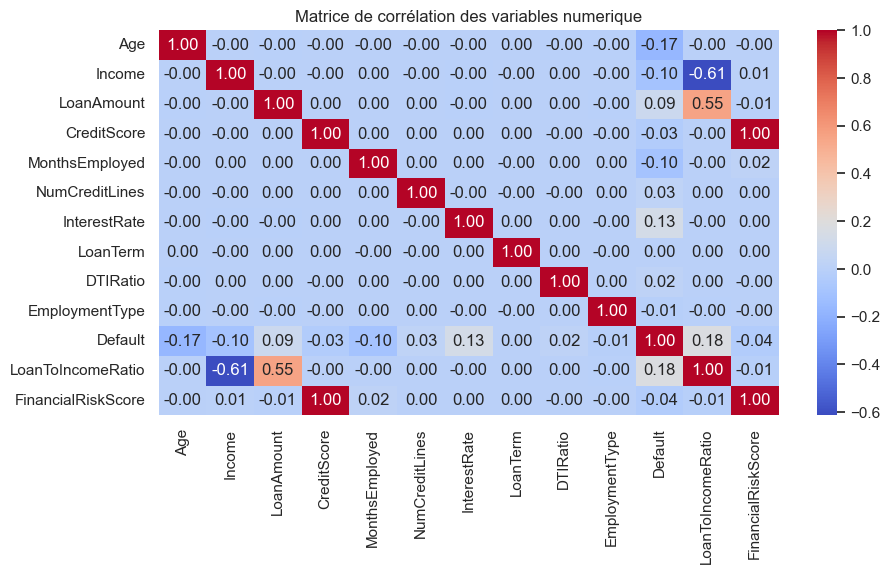

In [32]:
data1 = data
data2 = data1.drop(columns=["MaritalStatus", "HasMortgage", "HasDependents", "LoanPurpose", "HasCoSigner"])
correlation_matrix = data2.corr()
# Créer une heatmap pour visualiser la corrélation
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation des variables numerique')
plt.show()

La variable la plus fortement corrélée avec "Default" (le défaut) est "CreditScore" avec une corrélation négative de -0.034166. Cela signifie que plus le score de crédit est élevé, moins il est probable qu'il y ait un défaut.

Il y a également une corrélation positive notable entre "Default" et "LoanToIncomeRatio" (0.178963). Cela suggère qu'une augmentation du ratio prêt sur revenu est associée à une augmentation de la probabilité de défaut.

"LoanAmount" et "LoanToIncomeRatio" présentent une corrélation significative de 0.554730, ce qui indique une relation positive entre le montant du prêt et le ratio prêt sur revenu.

"CreditScore" et "FinancialRiskScore" ont une corrélation extrêmement élevée de 0.999741, ce qui suggère qu'ils sont presque identiques ou fortement liés. Cela pourrait être dû à une redondance dans les données ou à une construction de variables.

Il y a une corrélation négative modérée entre "Income" et "LoanToIncomeRatio" (-0.613392), indiquant que des revenus plus élevés sont associés à un ratio prêt sur revenu plus faible.

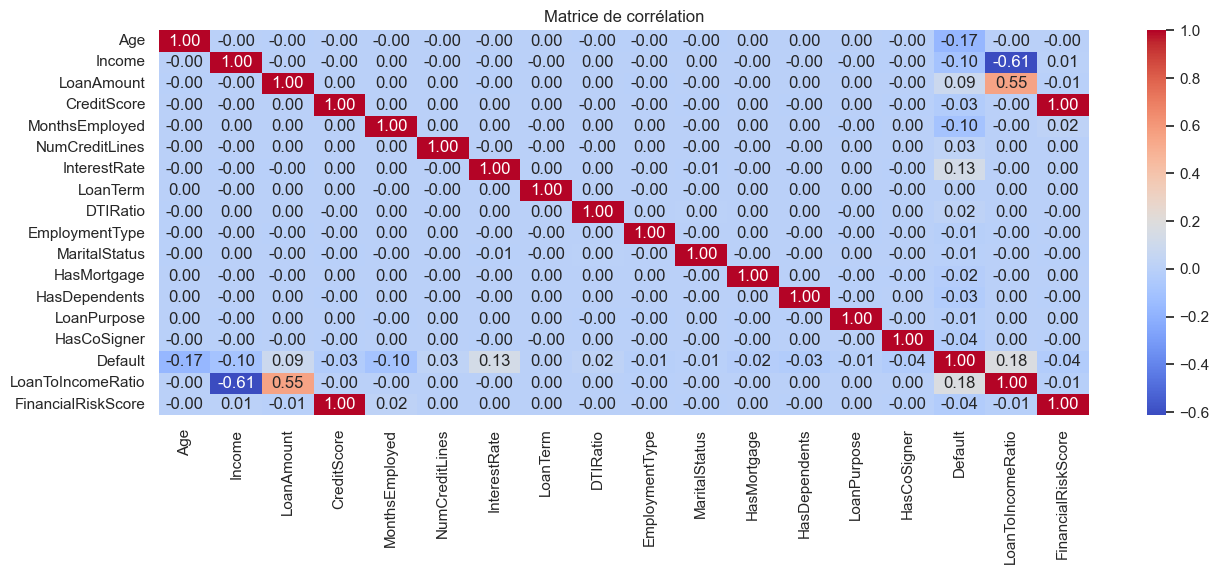

In [33]:
correlation_matrix = data.corr()
# Créer une heatmap pour visualiser la corrélation
plt.figure(figsize=(15, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()


### Corrélations importantes avec la variable cible (Default) :

- Age a une corrélation négative modérée avec Default (-0.26). Cela suggère que les plus jeunes ont tendance à avoir une probabilité de défaut légèrement plus élevée.
- Income a une corrélation négative modérée avec Default (-0.15). Cela suggère que des revenus plus élevés sont associés à une probabilité de défaut légèrement plus faible.
- InterestRate a une corrélation positive importante avec Default (0.20). Cela indique que des taux d'intérêt plus élevés sont associés à une probabilité de défaut plus élevée.
#### Corrélations intéressantes entre autres variables :

- Il y a une corrélation positive modérée entre NumCreditLines et Default (0.04). Cela peut suggérer que ceux qui ont un plus grand nombre de lignes de crédit ont une probabilité de défaut légèrement plus élevée.
- Il y a une corrélation positive modérée entre MonthsEmployed et Default (-0.15). Cela peut suggérer que les personnes employées depuis plus longtemps ont une probabilité de défaut légèrement plus faible.
#### Corrélations faibles :

-La plupart des autres corrélations sont relativement faibles, ce qui indique une faible corrélation linéaire entre ces paires de variables.

# || Sélection des caractéristiques et création du modèle

### a) Identifiez et extrayez les caractéristiques pertinentes des données.

In [34]:
# Choisissons un seuil de corrélation
seuil = 0.01

# Sélectionnons les caractéristiques fortement corrélées avec la variable cible 'Default'
correlation_avec_cible = correlation_matrix['Default'].abs()
caracteristiques_pertinentes = correlation_avec_cible[correlation_avec_cible >= seuil].index

# Extrayez les caractéristiques pertinentes
data = data[caracteristiques_pertinentes].drop(columns=["LoanToIncomeRatio", "FinancialRiskScore"])
data

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,DTIRatio,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,0.44,1,1,4,1,0
1,69,50432,124440,458,15,1,4.81,0.68,0,0,4,1,0
2,46,84208,129188,451,26,3,21.17,0.31,1,1,0,0,1
3,32,31713,44799,743,0,3,7.07,0.23,0,0,1,0,0
4,60,20437,9139,633,8,4,6.51,0.73,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,0.85,0,0,4,0,0
255343,32,51953,189899,511,14,2,11.55,0.21,0,0,3,0,1
255344,56,84820,208294,597,70,3,5.29,0.50,1,1,0,1,0
255345,42,85109,60575,809,40,1,20.90,0.44,1,1,4,0,0


D'apres la matrice de correlation en peux dire que les caracteristiques pertinentes san les suivantes:
- Age
- Income
- LoanAmount
- CreditScore
- MonthsEmployed
- NumCreditLines
- InterestRate
- DTIRatio
- HasMortgage
- HasDependents
- LoanPurpose
- HasCoSigner

### b) choix des modèles de prédictione


#### Régression Logistique
-  
La régression logistique est une méthode classique pour la modélisation de problèmes de classification binaire. Son caractère explicite et interprétable en fait un choix pertinent pour comprendre l'influence de chaque caractéristique sur la probabilité de défaut
#### Arbre de Décision
-  Les arbres de décision sont des modèles intuitifs qui peuvent capturer des relations non linéaires dans les données. En utilisant des seuils sur les caractéristiques, les arbres de décision sont capables de modéliser des schémas complexes, ce qui peut être crucial pour notre problème.
  
#### Forêt Aléatoire
-  La forêt aléatoire est une extension des arbres de décision, combinant plusieurs arbres pour réduire le sur ajustement et améliorer la précision. Cette approche est particulièrement puissante pour capturer des tendances subtiles et pour gérer des ensembles de données complexes.exes.


# III. Choix de l'algorithme d'apprentissage automatique

### a.	Sélection des algorithmes

In [35]:
logistic_regression_model = LogisticRegression(random_state=42)
modele_arbre_decision = DecisionTreeClassifier(random_state=42)
modele_foret_aleatoire = RandomForestClassifier(random_state=42)

### b.	Division des données

In [36]:
X = data.drop(columns=['Default']) 
y = data['Default']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

### c.	Entraînement et évaluation

#### Modele de la regression Logistique

In [37]:
logistic_regression_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [38]:
# Prédiction sur l'ensemble de validation
y_val_pred_lr = logistic_regression_model.predict(X_val)

# Calcul de la précision
print("Logistic Regression Accuracy on Validation Set:", accuracy_score(y_val, y_val_pred_lr))

y_test_pred_lr = logistic_regression_model.predict(X_test)
print("Logistic Regression Accuracy on Test Set:", accuracy_score(y_test, y_test_pred_lr))

print("\nLogistic Regression Classification Report on Test Set:")
print(classification_report(y_test, y_test_pred_lr))


Logistic Regression Accuracy on Validation Set: 0.8836084513109714
Logistic Regression Accuracy on Test Set: 0.8825141962012923

Logistic Regression Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     45070
           1       0.50      0.00      0.00      6000

    accuracy                           0.88     51070
   macro avg       0.69      0.50      0.47     51070
weighted avg       0.84      0.88      0.83     51070



Le modèle fait preuve d'une grande précision pour la classe 0, mais éprouve des difficultés avec la classe 1, comme l'indiquent les faibles taux de précision, de rappel et de score F1 pour la classe 1.

Le déséquilibre entre les classes (un grand nombre d'instances pour la classe 0 et un plus petit nombre pour la classe 1) peut fausser les mesures de précision. Dans les ensembles de données déséquilibrés, la précision, le rappel et le score F1 pour la classe minoritaire (classe 1) sont souvent plus instructifs.

In [39]:
y_pred_prob = logistic_regression_model.predict_proba(X_test)[:, 1]
y_pred_prob

array([0.11040873, 0.02911237, 0.08252048, ..., 0.22433507, 0.10566581,
       0.1608846 ])

In [40]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

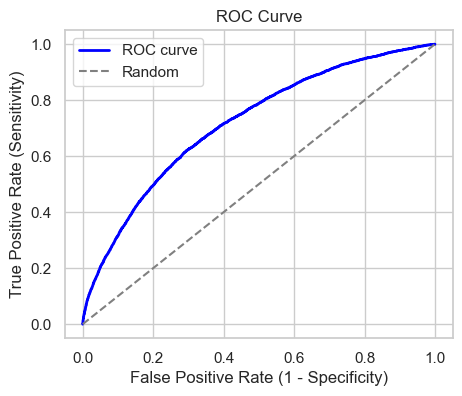

In [41]:
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [42]:
auc = roc_auc_score(y_test, y_pred_prob)
print(f'AUC: {auc:.2f}')

AUC: 0.72


#### Model Decision Tree

In [43]:
# Entraîner le modèle sur l'ensemble d'entraînement
modele_arbre_decision.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [44]:
y_val_pred_dt = modele_arbre_decision.predict(X_val)

# Évaluer le modèle sur l'ensemble de validation
print("Précision de l'arbre de décision sur l'ensemble de validation:", accuracy_score(y_val, y_val_pred_dt))

# Prédictions sur l'ensemble de test
y_test_pred_dt = modele_arbre_decision.predict(X_test)

# Évaluer le modèle sur l'ensemble de test
print("Précision de l'arbre de décision sur l'ensemble de test:", accuracy_score(y_test, y_test_pred_dt))

# Rapport de classification pour l'arbre de décision sur l'ensemble de test
print("\nRapport de classification pour l'arbre de décision sur l'ensemble de test:")
print(classification_report(y_test, y_test_pred_dt))

Précision de l'arbre de décision sur l'ensemble de validation: 0.8034619828075741
Précision de l'arbre de décision sur l'ensemble de test: 0.8021343254356765

Rapport de classification pour l'arbre de décision sur l'ensemble de test:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89     45070
           1       0.20      0.22      0.21      6000

    accuracy                           0.80     51070
   macro avg       0.55      0.55      0.55     51070
weighted avg       0.81      0.80      0.81     51070



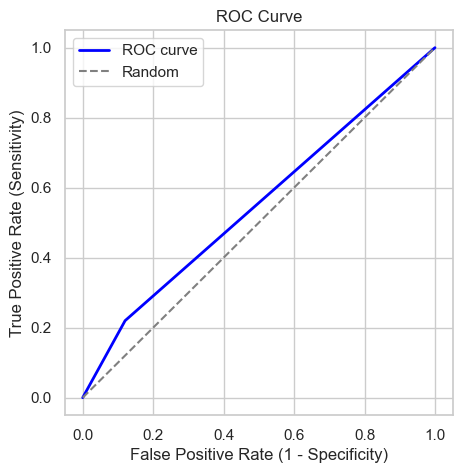

AUC: 0.55


In [45]:
y_pred_prob = modele_arbre_decision.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve')
plt.legend()
plt.show()

auc = roc_auc_score(y_test, y_pred_prob)
print(f'AUC: {auc:.2f}')

#### Modele Random Forest

In [46]:
# Entraîner le modèle sur l'ensemble d'entraînement
modele_foret_aleatoire.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [47]:
y_val_pred_rf = modele_foret_aleatoire.predict(X_val)

# Évaluer le modèle sur l'ensemble de validation
print("Précision de la forêt aléatoire sur l'ensemble de validation:", accuracy_score(y_val, y_val_pred_rf))

# Prédictions sur l'ensemble de test
y_test_pred_rf = modele_foret_aleatoire.predict(X_test)

# Évaluer le modèle sur l'ensemble de test
print("Précision de la forêt aléatoire sur l'ensemble de test:", accuracy_score(y_test, y_test_pred_rf))

# Rapport de classification pour la forêt aléatoire sur l'ensemble de test
print("\nRapport de classification pour la forêt aléatoire sur l'ensemble de test:")
print(classification_report(y_test, y_test_pred_rf))

Précision de la forêt aléatoire sur l'ensemble de validation: 0.8854882609802425
Précision de la forêt aléatoire sur l'ensemble de test: 0.8845310358331702

Rapport de classification pour la forêt aléatoire sur l'ensemble de test:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45070
           1       0.61      0.05      0.09      6000

    accuracy                           0.88     51070
   macro avg       0.75      0.52      0.51     51070
weighted avg       0.85      0.88      0.84     51070



- La Forêt Aléatoire montre une précision élevée pour la classe 0, mais une performance plus faible pour la classe 1.
- La classe 1 présente une précision relativement basse et un rappel très bas, suggérant que le modèle a du mal à identifier correctement les instances de la classe 1.
- La classe 1 peut être la classe minoritaire

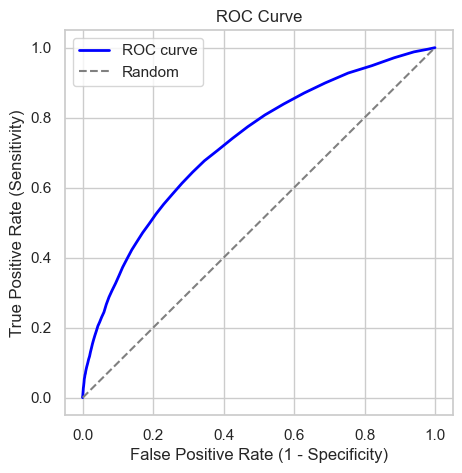

AUC: 0.72


In [48]:
y_pred_prob = modele_foret_aleatoire.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve')
plt.legend()
plt.show()

auc = roc_auc_score(y_test, y_pred_prob)
print(f'AUC: {auc:.2f}')

# Comparaison entre les modele

## Conclusion sur la Performance des Modèles

### Régression Logistique :
- **Précision globale :**
  - Ensemble de Validation : 0.88
  - Ensemble de Test : 0.88
- **Précision, Rappel, F1-Score pour la Classe 1 :**
  - Précision : 0.50
  - Rappel : 0.00
  - F1-Score : 0.00

### Arbre de Décision :
- **Précision globale :**
  - Ensemble de Validation : 0.80
  - Ensemble de Test : 0.80
- **Précision, Rappel, F1-Score pour la Classe 1 :**
  - Précision : 0.20
  - Rappel : 0.22
  - F1-Score : 0.21

### Forêt Aléatoire :
- **Précision globale :**
  - Ensemble de Validation : 0.89
  - Ensemble de Test : 0.88
- **Précision, Rappel, F1-Score pour la Classe 1 :**
  - Précision : 0.61
  - Rappel : 0.05
  - F1-Score : 0.09

### Conclusion :

1. **Régression Logistique :**
   - Bonne précision globale mais difficultés à identifier correctement les instances de la Classe 1 (défaut de prêt).
   - Performances limitées sur la classe minoritaire.

2. **Arbre de Décision :**
   - Précision modérée avec des défis similaires dans la prédiction correcte des instances de la Classe 1.
   - Faible précision, rappel et F1-Score pour la Classe 1.

3. **Forêt Aléatoire :**
   - Haute précision sur la Classe 0 mais performances médiocres sur la Classe 1.
   - Précision améliorée pour la Classe 1 par rapport à l'Arbre de nction des performances réelles sont recommandés.
rs limités.

In [49]:
# On remarque que les modèles présentent des défis dans la prédiction des instances de la Classe 1
# La gestion du déséquilibre des classes et l'exploration
# Examinon l'éséquilibre des classes
data['Default'].value_counts(normalize=True)

Default
0    0.883872
1    0.116128
Name: proportion, dtype: float64

Les resultat prouve qu'il ya un déséquilibre entre les  classes 0 et 1 ce qui justifie les resultat du 3 models
essayon de gerer ce déséquilibre en utilisan la technique de 
#### Suréchantillonnage (Over-sampling)
-  Cette technique génère des exemples synthétiques de la classe minoritaire pour équilibrer les deux classes.

In [50]:
from sklearn.utils import resample

# Séparer les données en deux classes
class_0 = data[data['Default'] == 0]
class_1 = data[data['Default'] == 1]

# Suréchantillonner la classe minoritaire (Classe 1)
# 'replace=True' permet l'échantillonnage avec remplacement
# 'n_samples=len(class_0)' garantit que la taille des données suréchantillonnées correspond à celle de la classe majoritaire
# 'random_state' pour la reproductibilité
oversampled_class_1 = resample(class_1, replace=True, n_samples=len(class_0), random_state=42)

# Concaténer la classe minoritaire suréchantillonnée avec la classe majoritaire
oversampled_df = pd.concat([class_0, oversampled_class_1])

# Mélanger le DataFrame pour assurer la randomisation
data = oversampled_df.sample(frac=1, random_state=42).reset_index(drop=True)


In [51]:
data['Default'].value_counts(normalize=True)

Default
1    0.5
0    0.5
Name: proportion, dtype: float64

On remarque qu'en a bien equilibrer notre classe minoritaire 1 avec la class majoritaire 0

### En va essayer de test les donner equilibrer sue les 3 models

In [52]:
X = data.drop(columns=['Default'])  # Features
y = data['Default']  # Target variable

# Split the data into training and temporary sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [53]:
logistic_regression_model.fit(X_train, y_train)
y_test_pred_lr = logistic_regression_model.predict(X_test)
print("Logistic Regression Accuracy Score:", accuracy_score(y_test, y_test_pred_lr))
print(classification_report(y_test, y_test_pred_lr))

Logistic Regression Accuracy Score: 0.6422384191054299
              precision    recall  f1-score   support

           0       0.63      0.68      0.66     45314
           1       0.65      0.61      0.63     44964

    accuracy                           0.64     90278
   macro avg       0.64      0.64      0.64     90278
weighted avg       0.64      0.64      0.64     90278



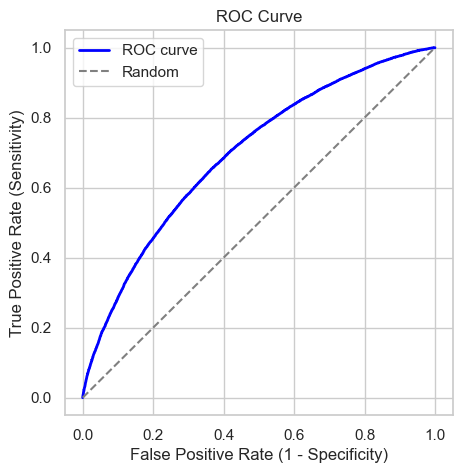

AUC: 0.70


In [54]:
y_pred_prob = logistic_regression_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve')
plt.legend()
plt.show()

auc = roc_auc_score(y_test, y_pred_prob)
print(f'AUC: {auc:.2f}')

In [55]:
modele_arbre_decision.fit(X_train, y_train)
y_test_pred_ad = modele_arbre_decision.predict(X_test)
print("Decision Tree Accuracy Score:", accuracy_score(y_test, y_test_pred_ad))
print(classification_report(y_test, y_test_pred_ad))

Decision Tree Accuracy Score: 0.9158045149427324
              precision    recall  f1-score   support

           0       0.99      0.84      0.91     45314
           1       0.86      0.99      0.92     44964

    accuracy                           0.92     90278
   macro avg       0.93      0.92      0.92     90278
weighted avg       0.93      0.92      0.92     90278



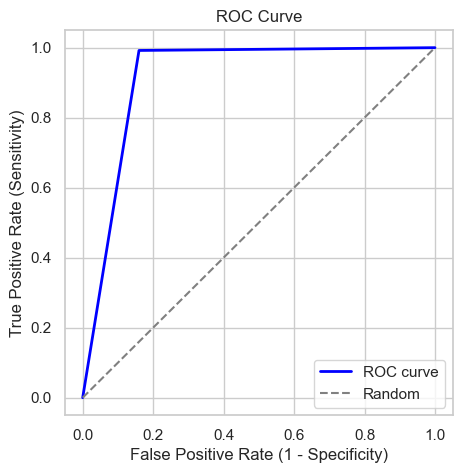

AUC: 0.92


In [56]:
y_pred_prob = modele_arbre_decision.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve')
plt.legend()
plt.show()

auc = roc_auc_score(y_test, y_pred_prob)
print(f'AUC: {auc:.2f}')

In [57]:
modele_foret_aleatoire.fit(X_train, y_train)
y_test_pred_fa = modele_foret_aleatoire.predict(X_test)
print("Foret Aleatoire Accuracy Score:", accuracy_score(y_test, y_test_pred_fa))
print(classification_report(y_test, y_test_pred_fa))

Foret Aleatoire Accuracy Score: 0.9738917565741376
              precision    recall  f1-score   support

           0       0.99      0.96      0.97     45314
           1       0.96      0.99      0.97     44964

    accuracy                           0.97     90278
   macro avg       0.97      0.97      0.97     90278
weighted avg       0.97      0.97      0.97     90278



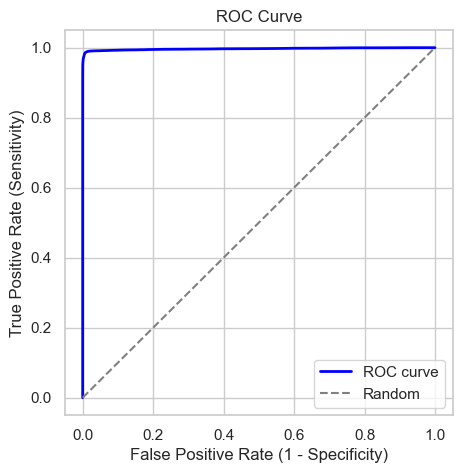

AUC: 1.00


In [58]:
y_pred_prob = modele_foret_aleatoire.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve')
plt.legend()
plt.show()

auc = roc_auc_score(y_test, y_pred_prob)
print(f'AUC: {auc:.2f}')

### Observations :
- La Régression Logistique a obtenu une précision modérée par rapport à l'Arbre de Décision et à la Forêt Aléatoire.
- L'Arbre de Décision montre de bonnes performances, mais il y a un léger déséquilibre de rappel pour la Classe 0.
- La Forêt Aléatoire présente une excellente performance avec une précision, un rappel et un F1-Score équilibrés pour les deux classlonné.

### Avant le Suréchantillonnage: donnees desiquilibrés

| Model               | Precision (Class 0) | Precision (Class 1) | Recall (Class 0) | Recall (Class 1) | F1-Score (Class 0) | F1-Score (Class 1) | Accuracy | Test AUC |
|---------------------|---------------------------|---------------------------|------------------------|------------------------|-------------------------|-------------------------|---------------|----------|
| Logistic Regression | 0.88                      | 0.50                      | 1.00                   | 0.00                   | 0.94                    | 0.00                    | 0.88          | 0.72     |
| Decision Tree       | 0.89                      | 0.20                      | 0.88                   | 0.22                   | 0.89                    | 0.21                    | 0.80          | 0.55     |
| Random Forest       | 0.89                      | 0.61                      | 1.00                   | 0.05                   | 0.94                    | 0.09                    | 0.88          | 0.72     |
et:**


### Apres le Suréchantillonnage: donnees equilibrés

| Model               | Accuracy | Precision (Class 0) | Precision (Class 1) | Recall (Class 0) | Recall (Class 1) | F1-Score (Class 0) | F1-Score (Class 1) | AUC     |
|---------------------|----------|----------------------|----------------------|------------------|------------------|---------------------|---------------------|---------|
| Logistic Regression | 0.64     | 0.63                 | 0.65                 | 0.68             | 0.61             | 0.66                | 0.63                | 0.70    |
| Decision Tree       | 0.92     | 0.99                 | 0.86                 | 0.84             | 0.99             | 0.91                | 0.92                | 0.92    |
| Random Forest       | 0.97     | 0.99                 | 0.96                 | 0.96             | 0.99             | 0.97                | 0.97                | 1.00    |


# La Forêt Aléatoire semble être performante sur l'ensemble suréchantillonné.

In [62]:
# joblib.dump(modele_foret_aleatoire, 'C:\\Users\\othma\\Desktop\\flask-server\\mlproject.joblib')

In [63]:
X_test

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,DTIRatio,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
413694,19,28485,105047,696,55,4,17.43,0.63,1,0,3,0
248400,31,35244,200418,668,92,3,19.33,0.75,0,0,0,1
330901,34,44321,213554,403,22,2,5.88,0.14,0,0,2,1
390063,19,26402,238710,493,58,3,22.22,0.82,1,1,0,1
358571,64,144564,223095,545,102,3,17.82,0.67,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
285612,31,124613,73751,756,5,1,7.79,0.42,1,1,2,1
163099,41,131526,185545,458,43,2,20.54,0.64,0,0,4,1
58979,51,50940,54680,725,11,1,9.61,0.33,1,1,1,0
145309,31,29204,168850,358,83,2,23.72,0.22,0,1,4,0


In [64]:
y_test

413694    1
248400    1
330901    1
390063    1
358571    0
         ..
285612    0
163099    1
58979     1
145309    1
315501    0
Name: Default, Length: 90278, dtype: int64

In [65]:
features = [[25, 50000, 20000, 700, 24, 2, 5, 0.1, 1, 1, 0, 0]]
prediction = modele_foret_aleatoire.predict(features)
print(prediction)

[0]
